In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

In [78]:
train = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_train.csv')
test = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_test.csv')

In [79]:
frames = [train, test]
data = pd.concat(frames)


In [80]:
# Drop ID column
data.drop(['Id'], axis=1, inplace=True)

In [81]:
# Drop alley column
data.drop(['Alley'], axis=1, inplace=True)

In [82]:
# Drop poolQC column
data.drop(['PoolQC'], axis=1, inplace=True)

In [83]:
# Drop MiscFeatures column
data.drop(['MiscFeature'], axis=1, inplace=True)

In [84]:
# Drop Fence column
data.drop(['Fence'], axis=1, inplace=True)

In [85]:
# Drop MiscVal column
data.drop(['MiscVal'], axis=1, inplace=True)

In [86]:
# Drop FireplaceQA column
data.drop(['FireplaceQu'], axis=1, inplace=True)

In [87]:
# Drop values with no sale price

In [88]:
data['SalePrice'].replace('', np.nan, inplace=True)

In [89]:
data.dropna(subset=['SalePrice'], inplace=True)

In [90]:
# Separate X and y
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

In [91]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### EDA

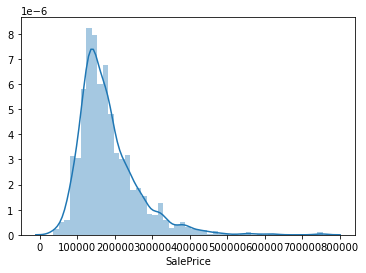

In [62]:
sns.distplot(data['SalePrice']);

We can see that the Sale Price is not normally distributed, so we will need to do a log transformation

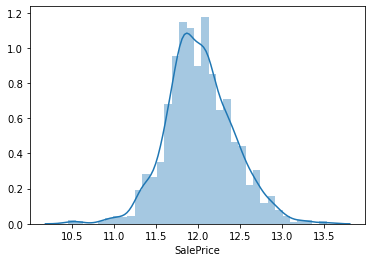

In [64]:
sns.distplot(np.log(data['SalePrice']))

### Missing Values

In [126]:
#check for missing values
data.isna().sum()

MSSubClass                    0
MSZoning                      0
LotFrontage                 259
LotArea                       0
Street                        0
                           ... 
SaleType                      0
SaleCondition                 0
SalePrice                     0
Total_Bathrooms               0
Basement_Total_Bathrooms      0
Length: 72, dtype: int64

We have 259 missing values in LotFrontage. We can fill missing LotFrontage values based on mean LotArea/LotFrontage value.

In [138]:
# Fill missing LotFrontage values based on median LotArea/LotFrontage value
data['LotFrontage'] = data['LotFrontage'].fillna((data['LotArea']/data['LotFrontage']).median())

In [142]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [147]:
# Fill missing MasVnrType values with None (mode)
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [153]:
# Fill missing MasVnrArea values with 0
data['MasVnrArea'] = data['MasVnrArea'].fillna(0.0)

In [159]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [162]:
# Fill missing Electrical value with mode
data['Electrical'] = data['Electrical'].fillna('SBrkr')

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MSSubClass                1460 non-null   int64  
 1   MSZoning                  1460 non-null   object 
 2   LotFrontage               1460 non-null   float64
 3   LotArea                   1460 non-null   int64  
 4   Street                    1460 non-null   object 
 5   LotShape                  1460 non-null   object 
 6   LandContour               1460 non-null   object 
 7   Utilities                 1460 non-null   object 
 8   LotConfig                 1460 non-null   object 
 9   LandSlope                 1460 non-null   object 
 10  Neighborhood              1460 non-null   object 
 11  Condition1                1460 non-null   object 
 12  Condition2                1460 non-null   object 
 13  BldgType                  1460 non-null   object 
 14  HouseSty

In [120]:
# What percent of properties have been remodeled?
(data['YearRemodAdd'] == data['YearBuilt']).sum()/len(data)

0.5232876712328767

In [75]:
data['Fireplaces'].unique()

array([0, 1, 2, 3])

In [94]:
data['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [95]:
data['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [121]:
data['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738])

### Baseline Model

In [93]:
dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X_train, y_train)
dummy_mean.score(X_test, y_test)

-0.0014293725084049136

### Feature Engineering

In [108]:
# Combine full and half bathrooms
data['Total_Bathrooms'] = data['FullBath'] + data['HalfBath']*.5

In [111]:
# Drop full & half bathrooms
data.drop(['FullBath'], axis=1, inplace=True)
data.drop(['HalfBath'], axis=1, inplace=True)

In [110]:
# Combine basement full and half bathrooms
data['Basement_Total_Bathrooms'] = data['BsmtFullBath'] + data['BsmtHalfBath']*.5

In [112]:
# Drop basement full & half bathrooms
data.drop(['BsmtFullBath'], axis=1, inplace=True)
data.drop(['BsmtHalfBath'], axis=1, inplace=True)

In [114]:
data['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [115]:
data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)